<a href="https://colab.research.google.com/github/snlynnoo/customer-segamentation-banking/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer Segmentaion 

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn
import warnings

# Set max row and col for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 100)

# Supress warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set max row and col for pandas dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
# import original dataset
# data = pd.read_csv('/content/drive/MyDrive/Colab notebooks/Crystal_CP_Segmentation/bank_transactions.csv')
# data.shape

(1048567, 9)

### Sampling

In [12]:
# Sample 0.5 % of the original dataset
# df_sub = data.sample(frac = 0.05, random_state = 42)
# df_sub.shape
# df_sub.to_csv('/content/drive/MyDrive/Colab notebooks/Crystal_CP_Segmentation/bank_transactions_sub.csv', index = False)

In [14]:
# Load sampled dataset
df = pd.read_csv('/content/drive/MyDrive/Colab notebooks/Crystal_CP_Segmentation/bank_transactions_sub.csv')
df.shape

(52428, 9)

### Data Exploration

In [34]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52428 entries, 0 to 52427
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            52428 non-null  object 
 1   CustomerID               52428 non-null  object 
 2   CustomerDOB              52254 non-null  object 
 3   CustGender               52369 non-null  object 
 4   CustLocation             52424 non-null  object 
 5   CustAccountBalance       52316 non-null  float64
 6   TransactionDate          52428 non-null  object 
 7   TransactionTime          52428 non-null  int64  
 8   TransactionAmount (INR)  52428 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [53]:
# Custom Function to generate descriptive statics
def describe_custom(df):
    desc = df.describe()
    skewness = df.skew()
    median = df.median()
    mode = df.mode()
    desc.loc['skewness'] = skewness
    desc.loc['median'] = median
    desc.loc['mode'] = mode.iloc[0]
    return desc

In [52]:
describe_custom(df).T

,count,mean,std,min,25%,50%,75%,max,skewness,median,mode
CustAccountBalance,52316.0,109653.375349,866119.916870,0.0,4808.8475,16912.415,57146.3775,1.150355e+08,82.346778,16912.415,0.0
TransactionTime,52428.0,157252.952220,51144.439513,1.0,124140.0000,164427.500,200041.0000,2.359490e+05,-0.841754,164427.500,200329.0
TransactionAmount (INR),52428.0,1574.259345,5911.173406,0.0,165.0000,459.520,1195.0000,4.290067e+05,20.236341,459.520,100.0


In [31]:
# Check missing values
df.isnull().sum()

TransactionID                0
CustomerID                   0
CustomerDOB                174
CustGender                  59
CustLocation                 4
CustAccountBalance         112
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
dtype: int64

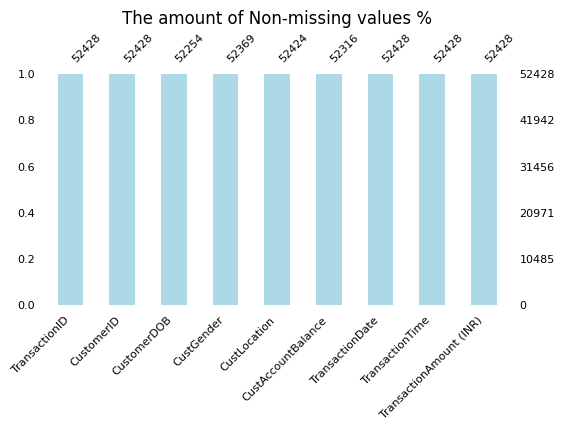

In [30]:
# Plot non-missing value %
msno.bar(df, color = "lightblue", figsize = (6,3), fontsize = 8)
plt.title("The amount of Non-missing values %", fontsize = 12)
plt.show()

In [37]:
df[df.duplicated() == True ].count()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64